<a href="https://colab.research.google.com/github/tajpouria/ml/blob/main/make_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget \
https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt

--2025-04-20 20:33:47--  https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2025-04-20 20:33:47 (6.48 MB/s) - ‘names.txt’ saved [228145/228145]



In [4]:
words = open("./names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
chars = ['.'] + sorted(list(set(''.join(words))))
stoi = { s: i for i, s in enumerate(chars) }
itos = { i: s for i, s in enumerate(chars) }

In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
N = torch.ones((27, 27), dtype=torch.int32)

In [24]:
b = {}
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


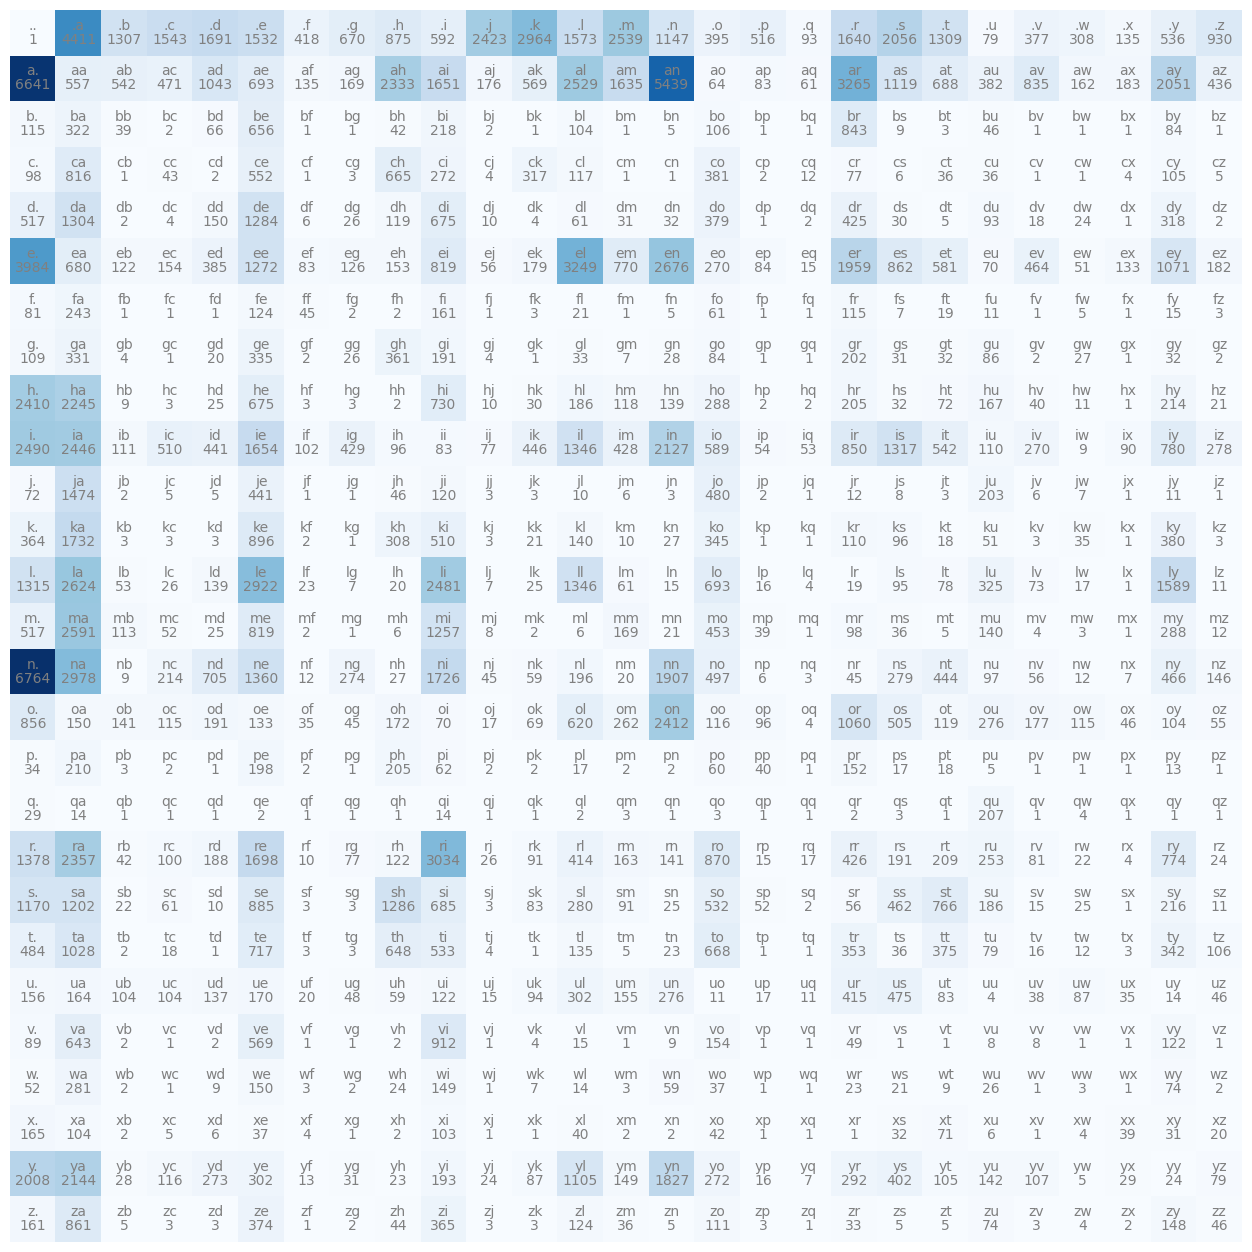

In [25]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
plt.axis('off');
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')


In [26]:
p = N[0].float()
p = p / N[0].sum()
p

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])

In [27]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [28]:
P = N.float()
P /= N.sum(1, keepdim=True)
P[0].sum()

tensor(1.)

In [29]:
g = torch.Generator().manual_seed(2147483647)
for ix in range(27):
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
.
anasah.
a.
elay.
e.
in.
.
ai.
n.
ailian.
atee.
.
ilanaauranilevias.
dedainrwieta.
ssonielylarte.
inveumerifontume.
usynslenaruani.
eore.
yaenon.
ha.
sabdinerimikimaynin.
anaasn.
avilesusush.
dgossmitan.
il.
.


In [30]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1, ix2 = stoi[ch1], stoi[ch2]
    p = P[ix1, ix2]
    logP = torch.log(p)
    log_likelihood += logP
    n += 1
    # print(f"{ch1}{ch2} {p:.4f} {logP:0.4f}")

nll = -log_likelihood
loss = nll / n
print(f"{log_likelihood=}")
print(f"{nll=}")
print(f"{loss=}")

log_likelihood=tensor(-38.8086)
nll=tensor(38.8086)
loss=tensor(2.4255)


In [36]:
# creating the training set for bigram (x, y)
xs, ys = [], []
for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix, iy = stoi[ch1], stoi[ch2]
    xs.append(ix)
    ys.append(iy)

xs, ys = torch.tensor(xs), torch.tensor(ys)

(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 <matplotlib.image.AxesImage at 0x7d75e8b94dd0>)

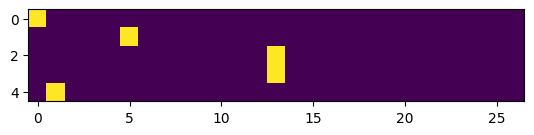

In [43]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc, plt.imshow(xenc)